# What we will do?

We will visualize the relationship between charges and other columns. We will predict charges with help by other columns.
### What new in this notebook?
#### plotly.express

# Saving Command

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="name")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "asad-cuet/scikit-learn" on https://jovian.ai


# Data Preparing

## Downloading Data


You're given a CSV file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.

Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets

In [43]:
data_url='https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [44]:
from urllib.request import urlretrieve

In [45]:
urlretrieve(data_url,'medical_data.csv')

('medical_data.csv', <http.client.HTTPMessage at 0x7f17667c78e0>)

In [46]:
import pandas as pd

In [47]:
medical_df=pd.read_csv('medical_data.csv')

In [48]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [49]:
col=['age','sex','bmi','children','smoker','region','charges']  # it will help to see column later

## Cleaning Data

In [50]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


No empty,no illogical value in the dataset

# Exploratory Data Analysis

#### Parpose of Visualizaion:
To find out the relationship between charges and other column.We will find which collumn effect charges much

## Setting

In [52]:
!pip install plotly --quiet

In [53]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [54]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

## Visualizing Age

Age is numerical comun.Min is 18 and max is 64.So quantity is 64-18 = 47. So we will take 47 bars in histogram. We learnt before that histogram is used for numerical value.Here we will use poty histogram.,Also matplotlib histogram  

In [55]:
px.histogram(medical_df,
         x='age',
         marginal='box',
         nbins=47,
         title='Distribution of Age'
         )


In [56]:
fig=px.histogram(medical_df,
         x='age',
         marginal='box',
         nbins=47,                    # if you ignore it,it px will generate bar autimatically
         title='Distribution of Age')
fig.update_layout(bargap=0.1)       #Gap between bar
fig.show()  #no effect

Almost Uniform

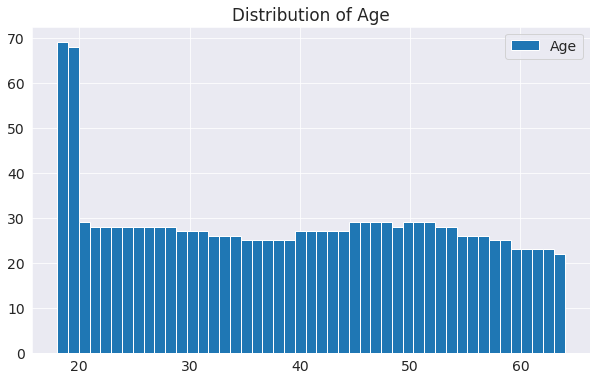

In [57]:
plt.title('Distribution of Age')
plt.hist( [medical_df.age] , bins=47 , stacked=True )
plt.legend(['Age']);

What is the difference in them and which is better ???

In [58]:
col

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

## Distribution of bmi

In [59]:
fig=px.histogram(medical_df,
         x='bmi',
         marginal='box',
       #  nbins=47,      //generate auto
         color_discrete_sequence=['red'],        
         title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()  #no effect

Gaussian Distribution

## Age vs BMI

In [60]:
fig=px.histogram(medical_df,
         x='age',
          y='bmi',
           marginal='box',
            nbins=47,      #generate auto
         color_discrete_sequence=['red'],        
         title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()  #no effect

## Distribution of charges

In [61]:
col

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [62]:
fig=px.histogram(medical_df,
         x='charges',
         marginal='box',
         color='smoker',      # it color smoker column        
         color_discrete_sequence=['red','green'],        
         title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()  #no effect

Distribution follows power low

## Distribution of Smoker

In [63]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [64]:
fig=px.histogram(medical_df,
         x='smoker',
         marginal='box',
         color='sex',
         color_discrete_sequence=['green','blue'],        
         title='Smoker')
fig.update_layout(bargap=0.1)
fig.show()  #no effect

## Age vs Charges

Age and charges both is numerical column.To visualize this we will use scatter

In [65]:
fig=px.scatter(medical_df,
               x='age',
               y='charges',
               color='smoker',
               opacity=0.8,
               hover_data=['sex'],
               title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

3 cluster shown in figure, first is linear

## BMI and Charges

In [66]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'],  #show data on hover 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that 
For non-smokers:  an increase in BMI doesn't seem to be related to an increase in medical charges.
For smoker:       medical charges seem to be significantly higher for smokers with a BMI greater than 30.

## Children vs charges

Both is numerical value. For 1 child charges value will much.At this time we will use px.violin

In [67]:
px.violin(medical_df,x='children',y='charges')

Width tell us that how many value lies there

Visualization shown, there is no relationship between charges and children

## Result of Visualization

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns.
#### E.g. "age" and "charges" 
seem to grow together, whereas "bmi" and "charges" don't.

#### Correlation
This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

# Correlation or R value

<b>Pupose:</b> Relationship between two column is often expressed numerically using a measure called the correlation coefficient

<b>Strength:</b> The greater the absolute value of the correlation coefficient, the stronger the relationship.

<b>Zero Value:</b> A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

<b>+1 or -1 Value:</b> This is called <b>R Approach</b>. The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

<b>Value between 0 and +/-1</b> When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line.

<b>+ Value:</b> Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

<b>- Value:</b> Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

## Charges vs Age

In [68]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [69]:
medical_df.age.corr(medical_df.charges)

0.2990081933306476

No matter on first or 2nd column

## Charges vs BMI

In [70]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362878

## Charges vs Smoker

To compute the correlation for categorical columns, they must first be converted into numeric columns.



In [71]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)  #map takes function or dictionary.if no return 0, if yes return 1
medical_df.charges.corr(smoker_numeric)

0.7872514304984782

## Correlation matrix

In [72]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Also by heatmap:

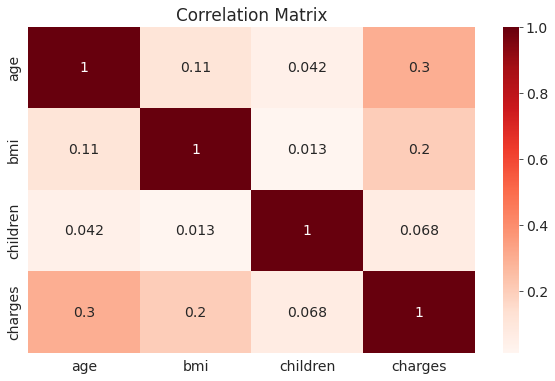

In [73]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

<b>Result:</b> Smoker and age column have the strongest correlation with "charges".

# Linear Regression (shown how its work)

## Choosing data

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. 

First, let's create a data frame containing just the data for non-smokers.

In [74]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

Next, let's visualize the relationship between "age" and "charges"

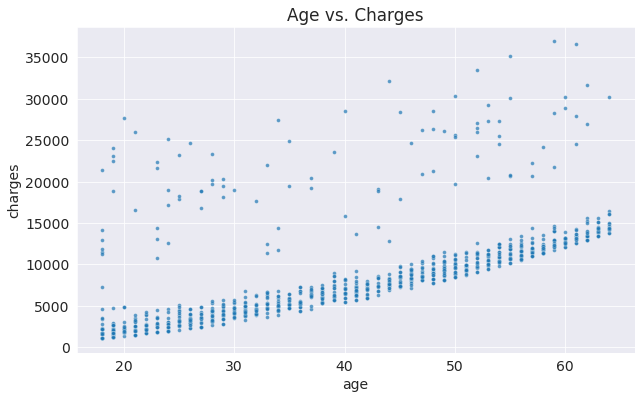

In [75]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

## what we will do?

We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

<b>Y=wX+B</b>

The line is characterized two numbers: 
w
 (called "slope") and 
b
 (called "intercept").

<b>We'll try determine w and b for the line that best fits the data.</b>

This technique is called linear regression

<b>1:</b> Create a function to predict charges using manual w,b value <br>
<b>2:</b> Check is models fits data <br>
<b>3:</b> Create another function to Find perfect w,b value which best fit. Manually input value and see distribution. <br>
<b>4:</b> predict charges using w,b <br>
<b>5:</b> Check is models fits data <br>

## Function to predict charges

In [76]:
def estimate_charges(age, w, b):
    return w * age + b

Let assume w,b

In [77]:
w = 50
b = 100

Predict charges

ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

## Checking Model

In [93]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

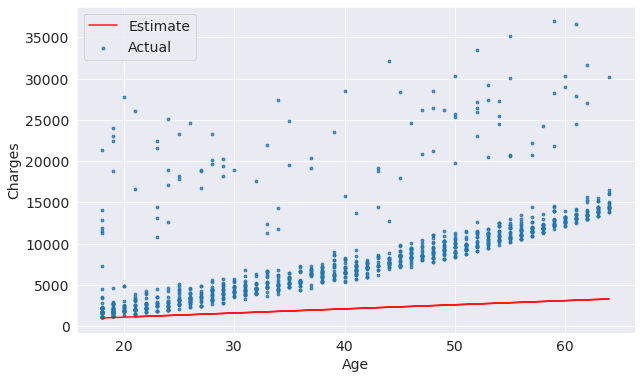

In [94]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

No fitted, because value of w,b is not perfect

## Function to find w,b

In [80]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

<b>Try diffrent value</b>

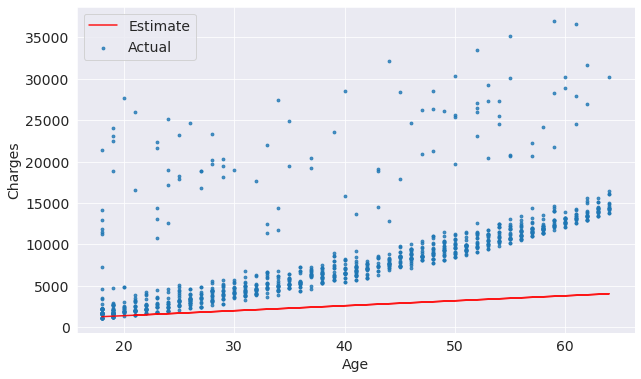

In [81]:
try_parameters(60, 200)

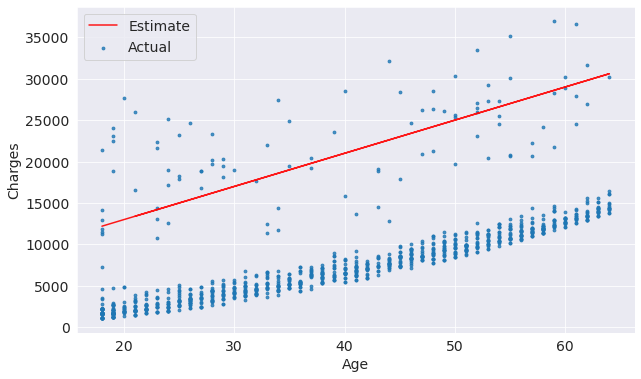

In [82]:
try_parameters(400, 5000)

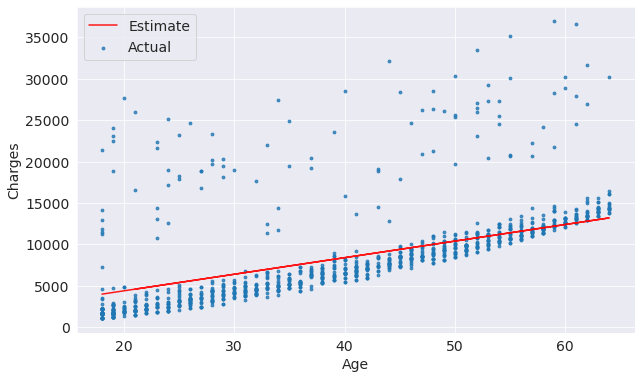

In [83]:
try_parameters(200, 400)

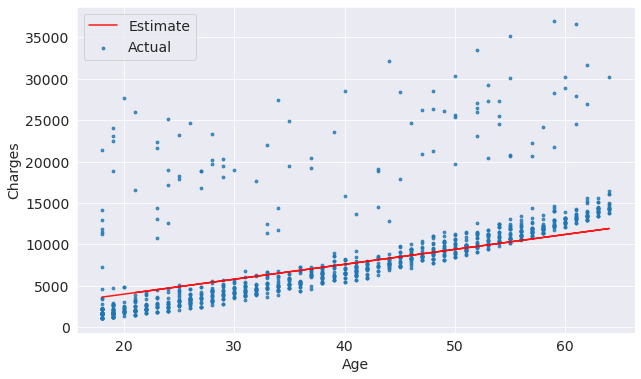

In [84]:
try_parameters(180, 400)

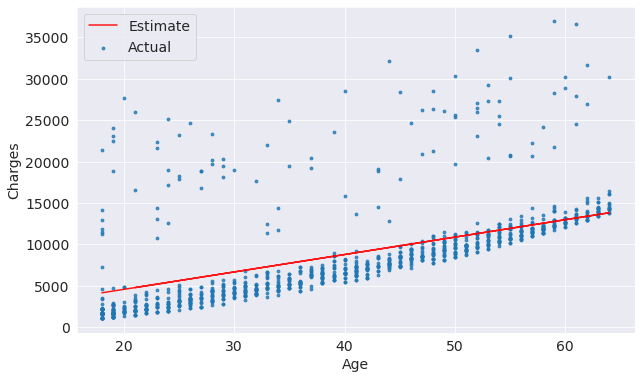

In [85]:
try_parameters(210, 380)

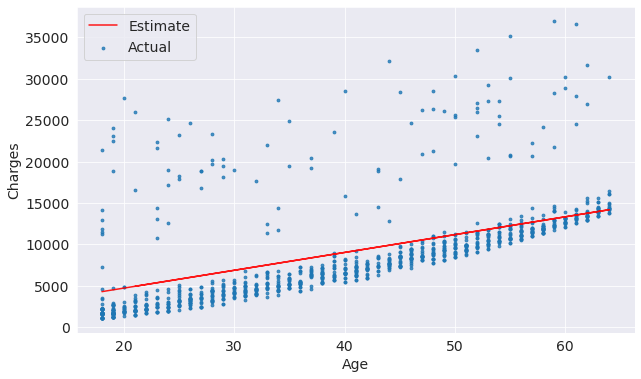

In [86]:
try_parameters(215, 430)

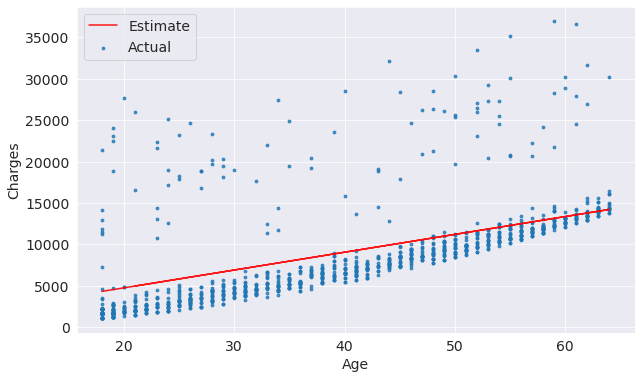

In [87]:
try_parameters(215, 460)

## Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

Calculate the difference between the targets and predictions (the differenced is called the "residual")
Square all elements of the difference matrix to remove negative values.
Calculate the average of the elements in the resulting matrix.
Take the square root of the result

The result is a single number, known as the root mean squared error (RMSE) How it works:<br>
<b>1.</b>Calculate the difference between the targets and predictions (the differenced is called the "residual")<br>
<b>2</b>.Square all elements of the difference matrix to remove negative values.<br>
<b>3.</b>Calculate the average of the elements in the resulting matrix.<br>
<b>4.</b>Take the square root of the result<br>

In [88]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

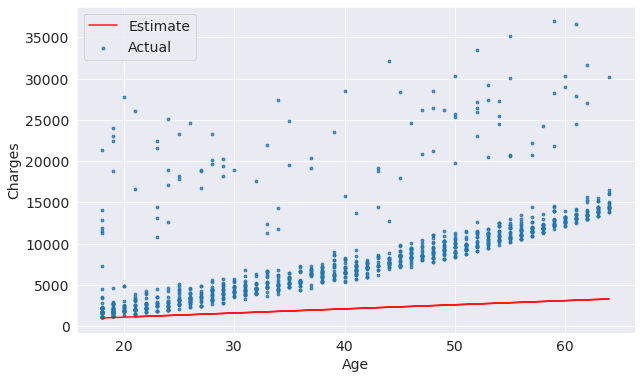

In [89]:
try_parameters(w, b)

In [90]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)
rmse(targets, predicted)

8461.949562575488

Here's how we can interpret the above number: On average, each element in the prediction differs from the actual target by $8461.

The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Lats modify the try function

In [91]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575488


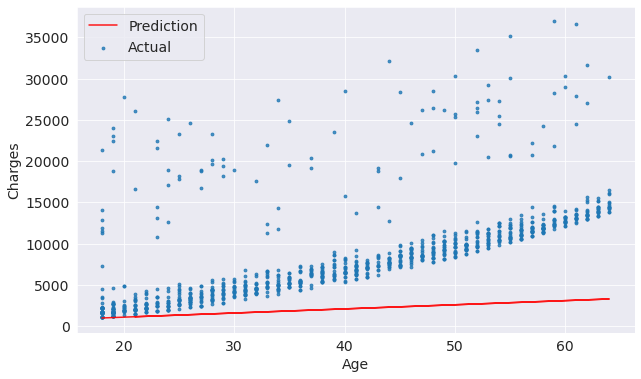

In [92]:
try_parameters(50, 100)

## Optimizer

Next, we need a strategy to modify weights w and b to reduce the loss and improve the "fit" of the line to the data.

There are 2 methods:<br>
1.Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets) <br>
2.Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets) <br>

ordinary least squares directly computes the best values for w and b using matrix operations

radient descent uses a iterative approach, starting with a random values of w and b and slowly improving them using derivatives

In practice, you'll never need to implement either of the above methods yourself. You can use a library like scikit-learn to do this for you.

# Linear Regression using Scikit-learn

## setup

In [95]:
!pip install scikit-learn --quiet
from sklearn.linear_model import LinearRegression

## Create a model object

In [96]:
model = LinearRegression()

## fit Method

we can use the fit method of the model to find the best fit line for the inputs and targets.

In [98]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



### End
Using SciKit-Learn, you can predict data easily. See SciKit-Learn in next notebook